In [4]:
!pip install pystan==2.19.1.1

use conda to install prophet and plotly to environment
```conda install -c conda-forge fbprophet -y
conda install plotly -y```


Make text ITALIC: *Italic*
Make text BOLD: **Bold**
List item as a bullet: dash and space -
List item as a number: Simple as number and dot 1.
Indenting text: Greater than and space >
Inline code span: Back quotation mark " ` "
Block of code: Triple back quotation marks " ``` "
Link a section: [Title of Section](#title-of-section)
Hyperlink: [Text](URL)

In [34]:
import fbprophet

In [4]:
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [29]:
import pandas as pd
from pandas import read_csv
from pandas import to_datetime

In [14]:
df = pd.read_csv(r'data\NASDAQ-1-YEAR- DAILY.csv')

<AxesSubplot:>

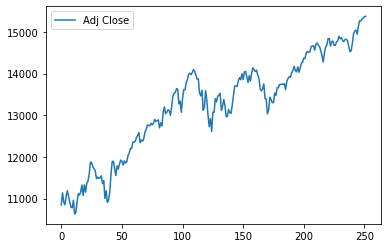

In [18]:
df.plot(y="Adj Close")

In [23]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-08,10900.700195,11131.500000,10837.200195,10847.690430,10847.690430,3872230000
1,2020-09-09,11064.759766,11217.690430,10970.450195,11141.559570,11141.559570,3531780000
2,2020-09-10,11235.530273,11299.530273,10875.019531,10919.589844,10919.589844,3814100000
3,2020-09-11,11010.070313,11033.040039,10728.030273,10853.549805,10853.549805,3609190000
4,2020-09-14,11010.139648,11118.290039,10982.259766,11056.650391,11056.650391,3716820000


In [27]:
dfAdjClose = df[['Date', 'Adj Close']]

In [40]:
dfAdjClose.columns = ['ds', 'y']
# define the model
model = fbprophet.Prophet()
# fit the model
model.fit(dfAdjClose)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
